# 03 Barometric pressure lows statistical analysis

In [1]:
# Import libraries and functions
from datetime import date

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import pandas as pd

from qartod_testing.local_qc_test import load_gross_range_qartod_test_values, load_climatology_qartod_test_values
from ooi_data_explorations.common import m2m_request, m2m_collect

In [2]:
# Set refdes and other data stream parameters
refdes = 'CP01CNSM-SBD11-06-METBKA000'
site, node, sensor = refdes.split('-',2)
method = 'recovered_host'
stream = 'metbk_hourly'

In [3]:
# Import async data request dict from text file saved in notebook 01
file = f"../data/external/{refdes}_{method}_{stream}_asyncm2m.txt"
with open(file) as f:
    data = eval(f.read())

In [4]:
# Load data from thredds catalog via M2M API
cnsm_metbk = m2m_collect(data, tag=('.*metbk_a_dcl_instrument_recovered.*\.nc$'))

In [6]:
# Create function to make plots with color from QARTOD flag result
def color_by_flag(ds, parameter, ax=None, fig=None):
    """ from dataset and parameter name string
    plot a timeseries of the named parameter and 
    color data points based on the corresponding QARTOD
    flag in the relevant _qartod_result parameter in
    the dataset.
    To-do: (maybe not if providing axes works better) 
    if parameter is a list-type, create subplots
    for each of the listed parameters
    Kylene M Cooley
    Version 6 Feb 2024
    
    Inputs:
    -------
    ds, xarray dataset
    parameter, string
    ax, optional matplotlib axes object
    fig, required if ax is provided
    
    Returns:
    --------
    fig, matplotlib figure object
    ax, matplotlib axes object
    """
    # Create data arrays to plot/color points
    da_plot = ds[parameter]
    da_color = ds[f"{parameter}_qartod_results"]
    
    # Create new axes object if none provided
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(8,3), layout="tight")
        # Plot data points in scatter plot
        ax.scatter(da_plot['time'].where(da_color==1), da_plot.where(da_color==1), s=2, edgecolors='none',
                c='black', label="pass")
        ax.scatter(da_plot['time'].where(da_color==2), da_plot.where(da_color==2), s=2, edgecolors='none',
                c='gray', label="not evaluated")
        ax.scatter(da_plot['time'].where(da_color==3), da_plot.where(da_color==3), s=2, edgecolors='none',
                c='green', label="of interest")
        ax.scatter(da_plot['time'].where(da_color==4), da_plot.where(da_color==4), s=2, edgecolors='none',
                c='red', label="fail")
        plt.legend(markerscale=4)
        plt.grid()
    else:
        ax.scatter(da_plot['time'].where(da_color==1), da_plot.where(da_color==1), s=2, edgecolors='none',
                  c='black')
        ax.scatter(da_plot['time'].where(da_color==2), da_plot.where(da_color==2), s=2, edgecolors='none',
                c='gray')
        ax.scatter(da_plot['time'].where(da_color==3), da_plot.where(da_color==3), s=2, edgecolors='none',
                c='green')
        ax.scatter(da_plot['time'].where(da_color==4), da_plot.where(da_color==4), s=2, edgecolors='none',
                c='red')
        plt.grid()
    return fig, ax

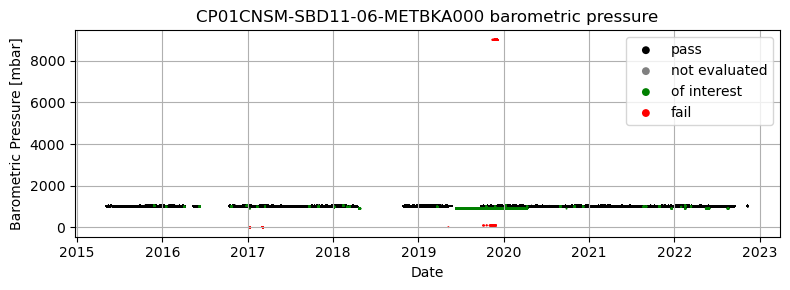

In [7]:
# Plot pressure at CNSM with color from qartod flag
fig, ax = color_by_flag(cnsm_metbk, "barometric_pressure")
plt.title("CP01CNSM-SBD11-06-METBKA000 barometric pressure")
plt.xlabel("Date")
plt.ylabel("Barometric Pressure [mbar]")
# ax.legend(loc="upper left", markerscale=4)
plt.show()

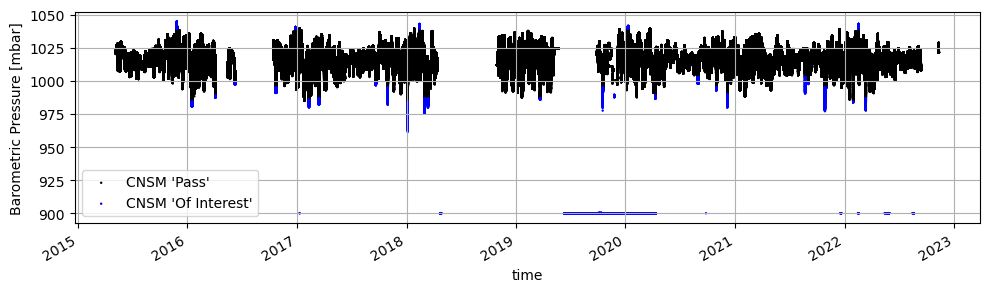

In [13]:
# Plot time series of barometric pressure at CNSM
fig, ax = plt.subplots(1, 1, figsize=(10, 3), layout="tight")
cnsm_metbk["barometric_pressure"].where(cnsm_metbk["barometric_pressure_qartod_results"]==1).plot.scatter(s=3,
    ax=ax, c="black", label="CNSM 'Pass'", edgecolors="none")
cnsm_metbk["barometric_pressure"].where(cnsm_metbk["barometric_pressure_qartod_results"]==3).plot.scatter(s=3,
    ax=ax, c="blue", label="CNSM 'Of Interest'", edgecolors="none")
plt.grid()
plt.legend()
plt.show()